In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt


def sigmoidal(t):
	return 1/(1 + np.exp(-t))


def dsigmoidal(t):
	s = sigmoidal(t)
	return s * (1 - s)


def generate_data(gamma=0.0):
	np.random.seed(99)
	n = 10
	t = np.random.rand(n) - 0.5
	noise = np.random.randn(n)*gamma
	signal = sigmoidal(t*6. + 1.)
	alpha = signal + noise
	return t, alpha


def plot(x, gamma):
	t, alpha = generate_data(gamma)
	t_axis = np.linspace(-3, 3, 50)
	plt.scatter(t, alpha)
	plt.plot(t_axis, sigmoidal(t_axis*x[0] + x[1]))
	plt.show()


def convergence_plot(delta_x_list):
	plt.plot(delta_x_list)
	plt.yscale("log")
	plt.show()


def armijo(f, x, g, d, rho=0.5, c=0.01, alpha=1, **kwargs):
	"""Armijo line search 

	Parameters:
		f: callable, Function to be minimized
		x: ndarray, current iterate x
		g: ndarray, current gradient of f() at x
		d: ndarray, current descent direction, e.g. -g
		rho: [float], scaling factor of stepsize
		c: [float], factor in minimum decrease condition
		alpha: [float], start step size
		**kwargs: [keyword args] 
	Returns: float"""
	f_x = f(x)

	gTd = g.dot(d)
	while np.linalg.norm(f(x + alpha*d)>np.linalg.norm(f_x + c*alpha*gTd)):
		alpha *= rho
	return alpha

In [2]:
def pdrv(g,x,j,h):
    y=np.empty(len(x))
    for i in range(len(x)):
        if i==j:
            y[i]=x[i]+h
        else:
            y[i]=x[i]
            
    return (g(y)-g(x))/(h)

def grad(g,x,h):
    y=np.empty(len(x))
    for i in range(len(x)):
        y[i]=pdrv(g,x,i,h)
        
    return y

def f(x):
    t,alpha=generate_data()
    return sigmoidal(x[0]*t+x[1])-alpha

f([2,1])

array([-0.09104891,  0.00958012, -0.11137887,  0.37523955, -0.11097417,
       -0.04511628,  0.19792994,  0.37143729, -0.10217826,  0.37984244])

In [3]:
def gauss_newton(f,gamma,tol=1e-5, maxit=100000):
    
    def jac(x):
        t,alpha=generate_data(gamma=gamma)
        jac=np.empty([0])
        for i in range(10):
                f= lambda x: sigmoidal(x[0]*t[i]+x[1])-alpha[i]
                jac=np.append(jac,grad(f,np.array(x),0.00001))
        jac=jac.reshape(10,2)
        return jac
    
    x0 = np.zeros(2)
    Bk=jac(x0).T@jac(x0)
    delta_x=np.linalg.solve(Bk,-jac(x0).T@f(x0))
    x=x0
    it=0
    delta_list=[np.linalg.norm(delta_x)]
    while(it<maxit):

        tau=armijo(f,x,jac(x).T@f(x),delta_x)
        x=x+tau*delta_x
        Bk=jac(x).T@jac(x)
        delta_x=np.linalg.solve(Bk,-jac(x).T@f(x))
        delta_list.append(np.linalg.norm(delta_x))
        it+=1
        if(np.linalg.norm(delta_x)<tol):
            print(it)
            break
    return x,delta_list

x1,delta_list1=gauss_newton(f,0)
print(x1)
x2,delta_list2=gauss_newton(f,1e9)
print(x2)
x3,delta_list3=gauss_newton(f,1e10)
print(x3)

5
[6. 1.]
6
[6.00000294 0.99999986]
30
[5.99998642 0.99999867]


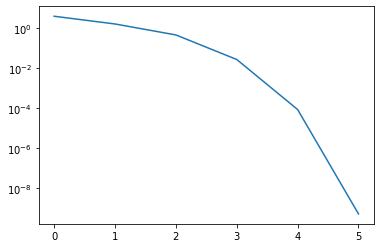

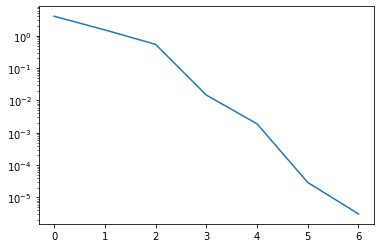

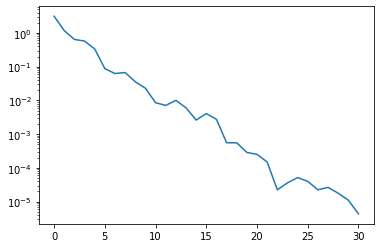

In [4]:
convergence_plot(delta_list1)
convergence_plot(delta_list2)
convergence_plot(delta_list3)